#Análisis de Datos numéricos:

Explicación del conjunto de datos que vamos a analizar y lo que pretendemos realizar:

Contamos con un conjunto de datos con variables numéricas y categóricas acerca de las características que presentan los tumores cerebrales.

En nuestro caso, la variable objetivo será 'diagnosis' que es una variable binaria donde establece si el paciente tiene cancer o no. Por lo que estaremos ante un problema de clasificación supervisada.

Vamos a realizar un análisis de los datos para finalizar con un modelo que pueda predecir el diagnóstico de nuevos casos.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Cancer.csv')

In [ ]:
n_individuos = len(data)
n_variables = len(data.columns)
print("Número de individuos en el dataset:", n_individuos)
print("Número de variables en el dataset:", n_variables)

Número de individuos en el dataset: 569
Número de variables en el dataset: 33


##Preprocesamiento y Análisis descriptivo inicial de los datos

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Observamos que la columna 32 tiene todo nulos. Por lo que la eliminamos. Además, elminimamos la columna de ID porque no nos aporta información.
El resto de variables no tienen nulos por lo que no tendremos que hacer técnicas de imputación de valores faltantes.

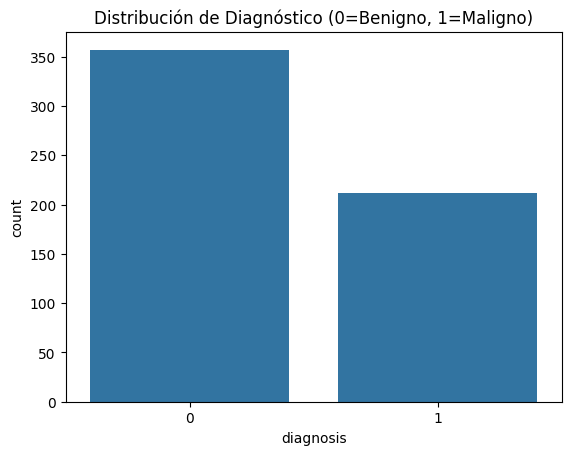

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

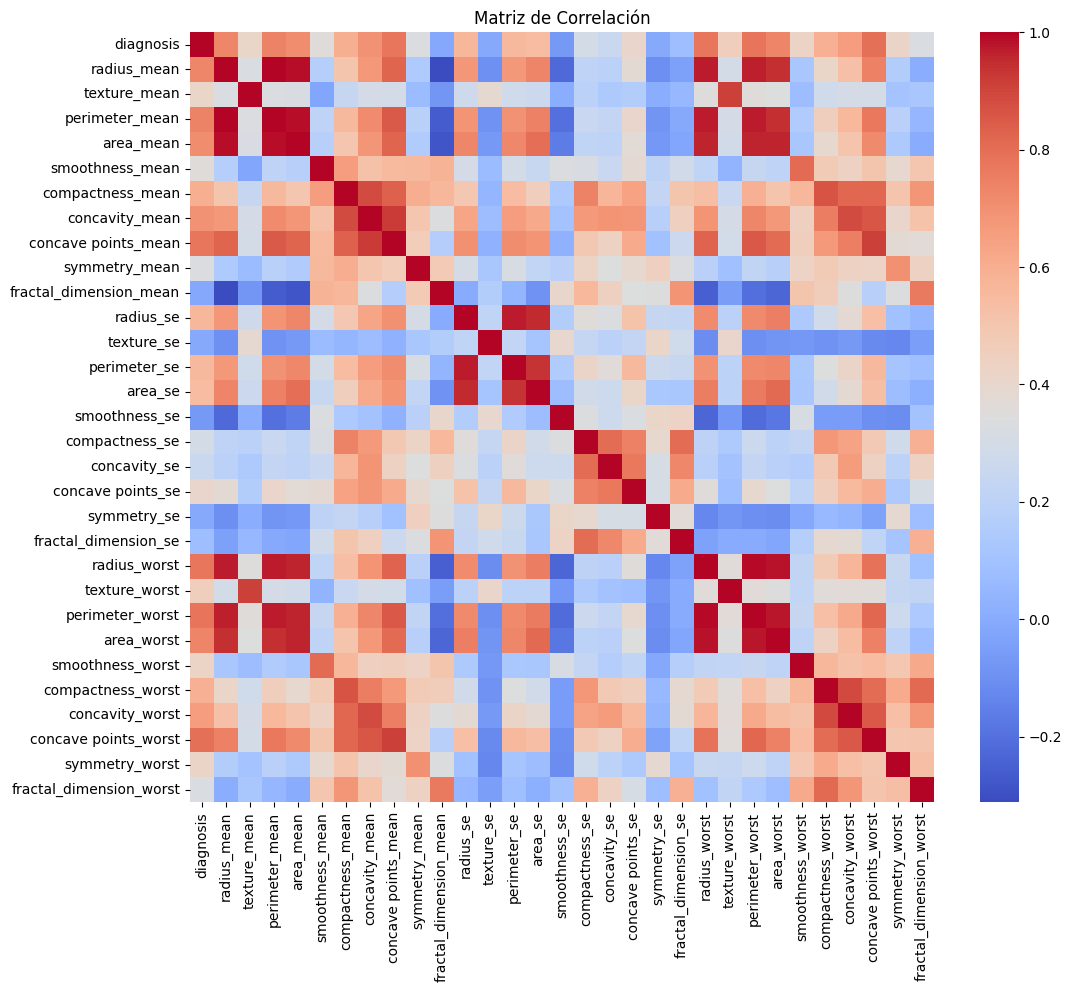

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



# 1. Preprocesamiento
# Eliminar columnas irrelevantes
if 'Unnamed: 32' in data.columns:
    data.drop(columns=['Unnamed: 32'], inplace=True)
if 'id' in data.columns:
    data.drop(columns=['id'], inplace=True)

# Convertir la columna 'diagnosis' en binaria (M -> 1, B -> 0) para poder realizar regresión logística
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Revisar valores nulos
data.isnull().sum()

# 2. Análisis exploratorio (EDA)
# a) Distribución de la variable objetivo
sns.countplot(x='diagnosis', data=data)
plt.title('Distribución de Diagnóstico (0=Benigno, 1=Maligno)')
plt.show()

# b) Estadísticas descriptivas
descriptive_stats = data.describe()
print(descriptive_stats)

# c) Matriz de correlación
plt.figure(figsize=(12, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlación')
plt.show()



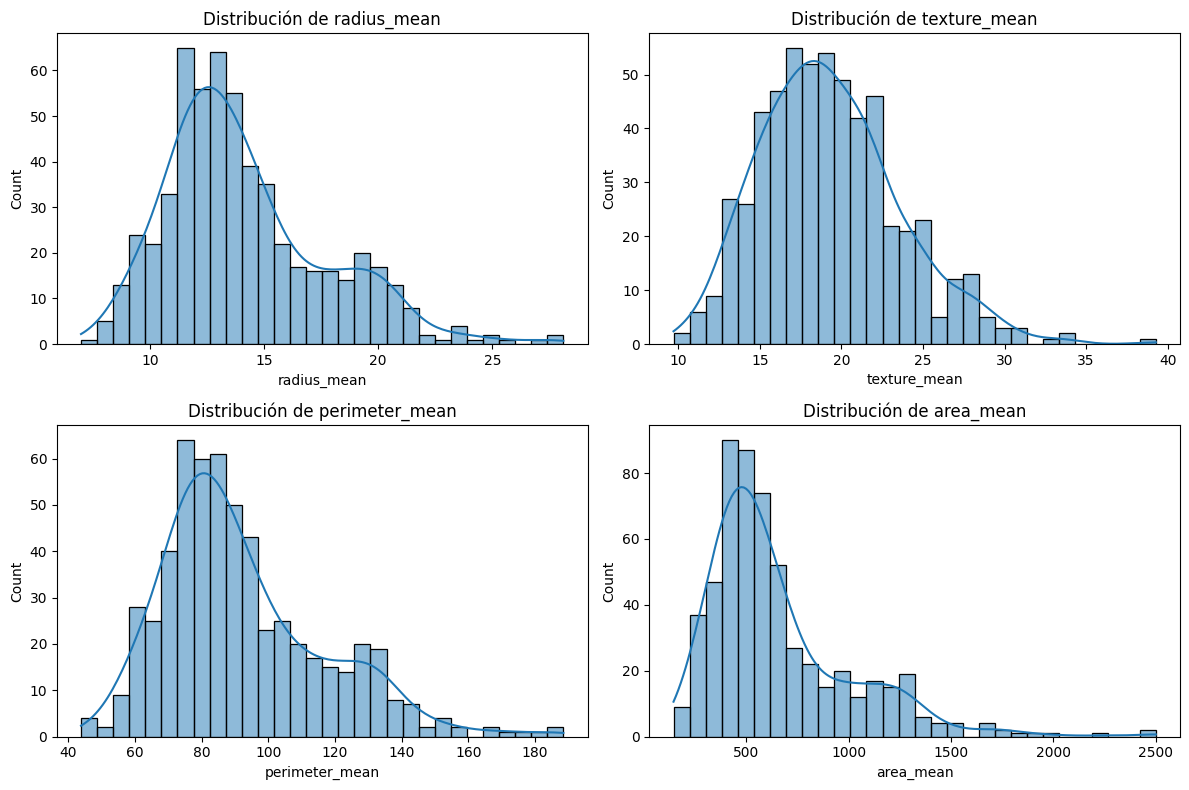

In [ ]:
# d) Distribuciones de características clave
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribución de {feature}')
plt.tight_layout()
plt.show()

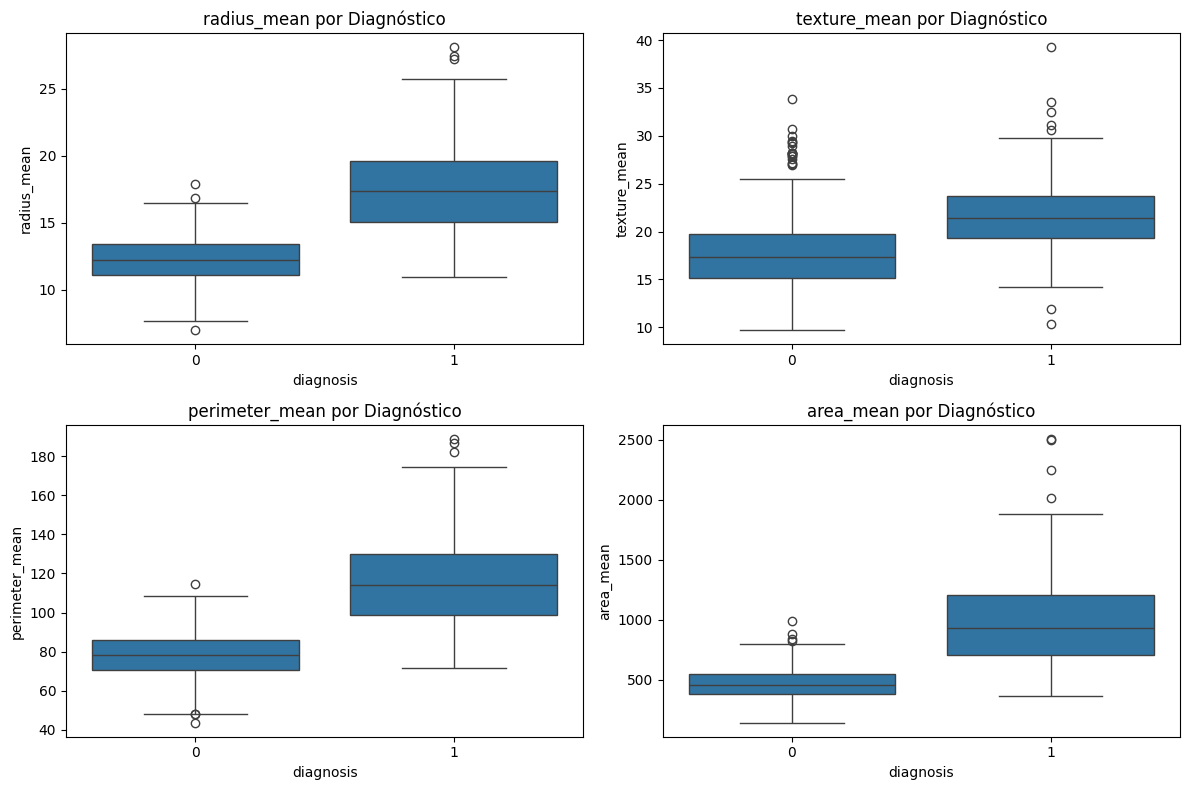

In [ ]:
# e) Relación entre características y diagnóstico
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='diagnosis', y=feature, data=data)
    plt.title(f'{feature} por Diagnóstico')
plt.tight_layout()
plt.show()

**Conclusiones iniciales:** Dejamos las variables como están puesto que no hay muchos atípicos y estos no parecen provocar ningún problema en la distribución de las variables.
Además, no realizaremos una estandarización salvo que la técnica a utilizar rquiera que las variables se distribuyan normal.

##Reducción de la dimensión

###**PCA** (Reducción lineal de los datos)

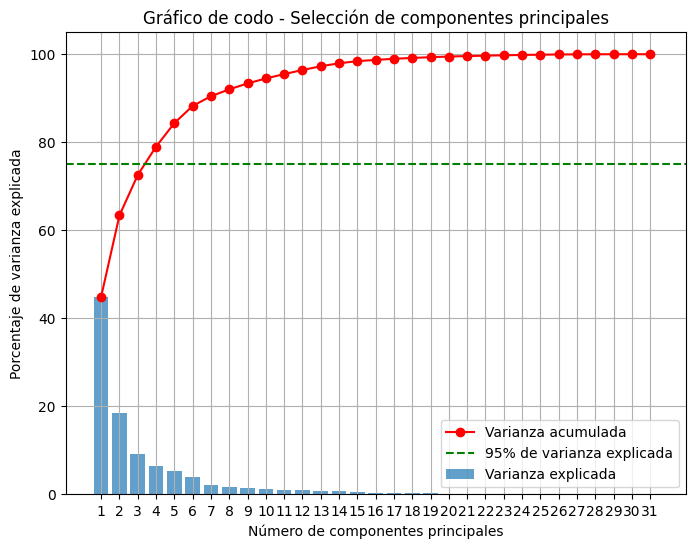


Varianza explicada por los 3 primeros componentes: 72.55%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Ajustar el PCA a los datos escalados
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

# Obtener varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_ * 100  # En porcentaje
varianza_acumulada = np.cumsum(varianza_explicada)  # Varianza acumulada

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.7, label="Varianza explicada")
plt.plot(range(1, len(varianza_explicada) + 1), varianza_acumulada, marker="o", color="r", label="Varianza acumulada")
plt.xticks(range(1, len(varianza_explicada) + 1))
plt.xlabel("Número de componentes principales")
plt.ylabel("Porcentaje de varianza explicada")
plt.title("Gráfico de codo - Selección de componentes principales")
plt.axhline(y=75, color="g", linestyle="--", label="95% de varianza explicada")
plt.legend()
plt.grid()
plt.show()

# Justificación para 2 componentes
print("\nVarianza explicada por los 3 primeros componentes: {:.2f}%".format(varianza_acumulada[2]))


Escogemos 3 componentes principales ya que superan el 70% de la variabilidad explicada. Además, coger un número bajo favorece la interpretación. Sin embaargo, si este es muy bajo, no recogería suficiente información de los datos y estaríamos perdiendo demasiada información.

In [ ]:
# PCA convencional
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_scaled)

# Comparar resultados
print("Resultados del PCA (primeras 5 observaciones):")
print(pca_result[:5])


Resultados del PCA (primeras 5 observaciones):
[[ 9.22577011  2.11619563 -0.94810915]
 [ 2.6558016  -3.78477586 -0.50282496]
 [ 5.89249212 -1.00557896 -0.48714898]
 [ 7.13540075 10.31871637 -3.33950107]
 [ 4.12942271 -1.90557914  1.45400012]]


In [ ]:

# Ajustar el PCA a los datos escalados
pca = PCA()  # Si quieres analizar todos los componentes
pca_result = pca.fit_transform(data_scaled)

# Obtener autovalores (varianza explicada) y autovectores (direcciones principales)
autovalores = pca.explained_variance_
autovectores = pca.components_

# Mostrar resultados
print("Autovalores (Varianza explicada):")
print(autovalores)

df_autovectores = pd.DataFrame(autovectores, columns=data.columns)
print("\nAutovectores (direcciones principales):")
print(df_autovectores.head(3))

# Para centrarnos en los dos primeros componentes
print("\nInterpretación del PCA:")
print("Varianza explicada por el primer componente: {:.2f}%".format(pca.explained_variance_ratio_[0] * 100))
print("Varianza explicada por el segundo componente: {:.2f}%".format(pca.explained_variance_ratio_[1] * 100))
print("Varianza explicada por el segundo componente: {:.2f}%".format(pca.explained_variance_ratio_[2] * 100))


Autovalores (Varianza explicada):
[1.39422741e+01 5.73643378e+00 2.85186154e+00 2.00188139e+00
 1.66199949e+00 1.20963379e+00 6.85924646e-01 4.85709057e-01
 4.17628800e-01 3.51511408e-01 3.05392113e-01 2.91498144e-01
 2.61469947e-01 2.12649275e-01 1.48837762e-01 8.83177777e-02
 8.00007715e-02 5.91392660e-02 5.15525101e-02 4.83008359e-02
 3.07603392e-02 2.95786345e-02 2.73928094e-02 2.43263453e-02
 1.75831161e-02 1.55005796e-02 8.07032705e-03 6.88182652e-03
 1.59126388e-03 7.42984526e-04 1.32868212e-04]

Autovectores (direcciones principales):
   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0   0.216917     0.216399      0.103599        0.224548   0.217965   
1  -0.077610    -0.226545     -0.058262       -0.207630  -0.223224   
2  -0.103826     0.002527      0.054751        0.001854   0.040151   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.137645          0.231504        0.251222             0.255266   
1         0.1887

In [ ]:
# DataFrame de autovectores
df_autovectores = pd.DataFrame(autovectores, columns=data.columns)

# Obtener las 3 columnas con los mayores valores en valor absoluto y sus valores originales para cada fila
top3_columnas_y_valores_abs = df_autovectores.apply(
    lambda fila: [(col, fila[col]) for col in fila.abs().nlargest(3).index], axis=1
)

# Mostrar resultados
print("\nTop 3 columnas con mayores valores (en valor absoluto) y sus valores originales por fila:")
for i, info in enumerate(top3_columnas_y_valores_abs[:3], start=1):  # Mostrar solo las 3 primeras filas
    print(f"Fila {i}: {info}")





Top 3 columnas con mayores valores (en valor absoluto) y sus valores originales por fila:
Fila 1: [('concave points_mean', 0.25526639876020174), ('concavity_mean', 0.2512217874235078), ('concave points_worst', 0.24628843608626746)]
Fila 2: [('fractal_dimension_mean', 0.36761955522487244), ('fractal_dimension_se', 0.2843317269956249), ('fractal_dimension_worst', 0.27644911805700867)]
Fila 3: [('texture_se', 0.36159518057288437), ('smoothness_se', 0.3001748312642047), ('symmetry_se', 0.28280285705605485)]


A partir de los resultados obtenidos, se puede interpretar cada componente principal basándonos en las variables más importantes (las que tienen los valores más altos en los autovectores). Vamos a analizar cada componente:

**Componente principal 1**:

Interpretación: Este componente principal está altamente influenciado por variables relacionadas con la forma y los contornos de las células cancerígenas, particularmente las características de concavidad (huecos en los bordes de las células).

'Concave points' y 'concavity' son características geométricas que suelen estar asociadas a la irregularidad de los bordes celulares.
En el diagnóstico de cáncer, estas características son importantes porque los bordes irregulares y profundos en las células son indicadores de malignidad.

**Conclusión: El primer componente parece estar capturando las características que miden la irregularidad estructural y los contornos de las células, lo que es crítico para diferenciar entre tumores malignos y benignos.**


**Componente principal 2**:

Interpretación: El segundo componente está dominado por la fractalidad de las células. La fractalidad mide la complejidad de los bordes y cómo estos cambian a distintas escalas.

Los valores altos en la fractalidad suelen estar asociados a bordes complejos e irregulares, características típicas de tumores malignos.

Esto sugiere que el segundo componente captura patrones de complejidad geométrica global de los bordes celulares, que también es una señal clave en el diagnóstico.

**Conclusión: Representa la complejidad geométrica global de los bordes celulares (fractalidad), otra señal clave de malignidad.**

**Componente principal 3**:

Interpretación: Este componente está relacionado con la textura, la suavidad y la simetría de las células.

'Texture' mide la variabilidad en los niveles de gris dentro de las células, una propiedad que cambia entre células benignas (más homogéneas) y malignas (más heterogéneas).

'Smoothness' está relacionada con la uniformidad de los bordes. Menor suavidad puede reflejar irregularidades, típicas de células malignas.

'Symmetry' mide el grado de equilibrio en la forma de las células. Tumores benignos suelen tener formas más simétricas, mientras que los malignos tienden a ser más asimétricos.

**Conclusión: El tercer componente parece estar evaluando características de textura interna y morfología global de las células, lo que ayuda a complementar las observaciones de los dos primeros componentes.**

###Reducción de dimensiones no lineal (**Autoencoder**)

Paso 1: Crear un Autoencoder
Un autoencoder es una red neuronal que tiene dos partes principales:

Codificador (encoder): Reduce la dimensión de los datos a un espacio latente.
Decodificador (decoder): Reconstruye los datos desde el espacio latente.
El espacio latente en el medio de la red actúa como las componentes principales en PCA.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Crear datos de ejemplo (o sustituir por tu matriz de datos)
np.random.seed(1000)


# Normalizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Parámetros del autoencoder
input_dim = data_scaled.shape[1]  # Número de variables originales
encoding_dim = 3  #Para poder comparar con PCA  de 2 dimensiones

# Definir las capas del autoencoder
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='linear')(encoder)

# Construir el modelo autoencoder
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compilar el modelo
autoencoder.compile(optimizer='adam', loss='mse')

# Entrenar el autoencoder
autoencoder.fit(data_scaled, data_scaled, epochs=500, batch_size=16, shuffle=True, validation_split=0.2)

# Extraer la parte del codificador para obtener las componentes latentes
encoder_model = Model(inputs=input_layer, outputs=encoder)

# Generar las representaciones latentes
latent_space = encoder_model.predict(data_scaled)

# Mostrar las dimensiones reducidas
print("Representación en el espacio latente (dimensión reducida):")
print(latent_space[:5])  # Las primeras 5 observaciones


Epoch 1/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.1063 - val_loss: 1.0406
Epoch 2/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1161 - val_loss: 0.9881
Epoch 3/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9894 - val_loss: 0.9551
Epoch 4/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0074 - val_loss: 0.9313
Epoch 5/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0147 - val_loss: 0.9058
Epoch 6/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8861 - val_loss: 0.8777
Epoch 7/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8097 - val_loss: 0.8470
Epoch 8/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9022 - val_loss: 0.8159
Epoch 9/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9194 - val_loss: 0.7810
Epoch 10/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7319 - val_loss: 0.7476
Epoch 11/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7729 - val_loss: 0.7150
Epoch 12/500
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

####Interpretación del espacio latente:

In [ ]:
# Extraer los pesos del encoder
encoder_weights = encoder_model.get_weights()[0]

# Crear un DataFrame para analizar las contribuciones
df_latente = pd.DataFrame(
    encoder_weights,
    index=data.columns,
    columns=[f"Latente_{i+1}" for i in range(encoder_weights.shape[1])]
)

# Mostrar las 3 variables con mayor peso (en valor absoluto) para cada componente latente
top3_columnas_latentes = df_latente.apply(
    lambda col: [(var, col[var]) for var in col.abs().nlargest(3).index],
    axis=0
)

# Mostrar los resultados
print("\nTop 3 columnas con mayores contribuciones a cada componente latente:")
for i, info in enumerate(top3_columnas_latentes.items(), start=1):
    print(f"Latente {i}: \n {info[1]}")



Top 3 columnas con mayores contribuciones a cada componente latente:
Latente 1: 
 0    (perimeter_mean, -0.29318178)
1        (symmetry_se, 0.22128588)
2      (smoothness_se, 0.21632947)
Name: Latente_1, dtype: object
Latente 2: 
 0      (radius_mean, 0.371648)
1      (radius_se, 0.26787058)
2    (perimeter_se, 0.2534391)
Name: Latente_2, dtype: object
Latente 3: 
 0    (fractal_dimension_se, 0.26530072)
1            (radius_mean, -0.26301268)
2            (concavity_se, 0.23099034)
Name: Latente_3, dtype: object


**Espacio Latente 1**

Variables principales:

'perimeter_mean' (-0.293): Contribución negativa importante. Relacionado con el perímetro promedio del núcleo celular en las imágenes.

'symmetry_se' (0.221): Contribución positiva. Representa la variación en la simetría de los núcleos celulares.

'smoothness_se' (0.216): Contribución positiva. Indica la variación en la suavidad de las células.

Interpretación:

**Este componente parece capturar una combinación de características relacionadas con la forma y la regularidad del núcleo celular, en particular la simetría y la suavidad. La relación negativa con el perímetro promedio sugiere que este componente podría diferenciar casos con núcleos grandes y asimétricos frente a núcleos más pequeños y regulares.**

**Espacio Latente 2**

Variables principales:

'radius_mean' (0.372): Mayor contribución positiva. Relacionado con el radio promedio del núcleo celular, una característica importante para distinguir entre células malignas y benignas.

'radius_se' (0.268): Contribución positiva. Representa la desviación estándar del radio, es decir, la variación en el tamaño de las células.

'perimeter_se' (0.253): Contribución positiva. Indica la variación en el perímetro de los núcleos celulares.


Interpretación:

**Este componente está claramente dominado por las dimensiones físicas del núcleo celular (radio y perímetro), tanto en términos de promedios como de variabilidad. Es probable que este componente capture la distinción entre células más grandes, características de tumores malignos, y células más pequeñas, características de tejidos benignos.**









**Espacio Latente 3**

Variables principales:

'fractal_dimension_se' (0.265): Contribución positiva. Representa la variabilidad en la complejidad del borde del núcleo celular.

'radius_mean' (-0.263): Contribución negativa. Relacionado con el tamaño promedio del núcleo celular.

'concavity_se' (0.231): Contribución positiva. Representa la variabilidad en la concavidad, es decir, los hundimientos en los bordes del núcleo.

Interpretación:

**Este componente parece capturar características relacionadas con la complejidad del borde y la forma del núcleo celular. La contribución negativa del radio promedio puede indicar una distinción entre células grandes con bordes más regulares y células más pequeñas con bordes complejos e irregulares.**


###Comparación entre ambos métodos:

**Evaluación del error de construcción:**

In [ ]:
# Reconstruir los datos desde el espacio latente
reconstruccion_autoencoder = autoencoder.predict(data_scaled)

# Calcular el error de reconstrucción (MSE)
mse_autoencoder = np.mean((data_scaled - reconstruccion_autoencoder) ** 2)



18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [ ]:

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_scaled)

# Reconstrucción con PCA
pca_reconstruccion = pca.inverse_transform(pca_result)

# Calcular el error de reconstrucción (MSE)
mse_pca = np.mean((data_scaled - pca_reconstruccion) ** 2)




In [ ]:
# Crear la tabla con los errores
resultados = pd.DataFrame({
    'Método': ['PCA', 'Autoencoder'],
    'Error de reconstrucción (MSE)': [mse_pca, mse_autoencoder]
})

print(resultados)

        Método  Error de reconstrucción (MSE)
0          PCA                       0.274485
1  Autoencoder                       0.276992


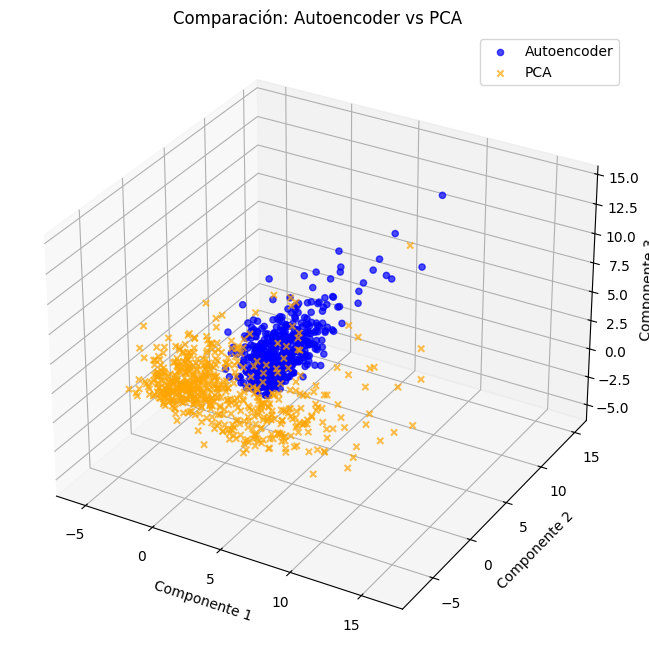

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necesario para gráficos 3D

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar el espacio latente del autoencoder
ax.scatter(
    latent_space[:, 0], latent_space[:, 1], latent_space[:, 2],
    alpha=0.7, label='Autoencoder', color='blue'
)

# Graficar el espacio de los componentes principales del PCA
ax.scatter(
    pca_result[:, 0], pca_result[:, 1], pca_result[:, 2],
    alpha=0.7, label='PCA', color='orange', marker='x'
)

# Etiquetas y título
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_zlabel("Componente 3")
ax.set_title("Comparación: Autoencoder vs PCA")

# Mostrar la leyenda
ax.legend()

# Mostrar la gráfica
plt.show()



**Conclusión** sobre los rsultados obtenidos:


Los resultados del autoencoder muestran una separación más directa de las características relacionadas con el diagnóstico de cáncer.

En contraste, el PCA genera componentes que maximizan la varianza explicada de forma global, lo que puede dificultar la interpretación en términos de características individuales específicas.

En cuanto a la representación gráfica, el autoencoder podría ser más eficiente en términos de representar la estructura subyacente de los datos, mientras que el PCA se ve limitado a solo captar la varianza lineal.

La mayor dispersión en el PCA y la mayor concentración en el autoencoder podrían reflejar la flexibilidad del autoencoder para ajustarse a relaciones más complejas.

Por otro lado, utilizamos la métrica de reconstrucción del modelo. En este caso los errore son muy similares.

Sin embargo, por lo mencionado anteriorimente, pensamos que es mejor la reducción de la dimensionalidad mediante el espacio latente.

#Análisis de Texto:

In [ ]:
pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 27.8 MB/s eta 0:00:00


In [ ]:
pip install nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.3 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Explicación del conjunto de datos que vamos a analizar y lo que pretendemos realizar:

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Text.csv')
print(data.head())
print(data.tail())

,Id,pub_title,dataset_title,dataset_label,cleaned_label
19656,b3498176-8832-4033-aea6-b5ea85ea04c4,RSNA International Trends: A Global Perspectiv...,RSNA International COVID-19 Open Radiology Dat...,RSNA International COVID Open Radiology Database,rsna international covid open radiology database
19657,f77eb51f-c3ac-420b-9586-cb187849c321,MCCS: a novel recognition pattern-based method...,CAS COVID-19 antiviral candidate compounds dat...,CAS COVID-19 antiviral candidate compounds dat...,cas covid 19 antiviral candidate compounds dat...
19658,ab59bcdd-7b7c-4107-93f5-0ccaf749236c,Quantitative Structure–Activity Relationship M...,CAS COVID-19 antiviral candidate compounds dat...,CAS COVID-19 antiviral candidate compounds dat...,cas covid 19 antiviral candidate compounds dat...
19659,fd23e7e0-a5d2-4f98-992d-9209c85153bb,A ligand-based computational drug repurposing ...,CAS COVID-19 antiviral candidate compounds dat...,CAS COVID-19 antiviral candidate compounds dat...,cas covid 19 antiviral candidate compounds dat...
19660,fd23e7e0-a5d2-4f98-992d-9209c85153bb,A ligand-based computational drug repurposing ...,CAS COVID-19 antiviral candidate compounds dat...,CAS COVID-19 antiviral candidate compounds data,cas covid 19 antiviral candidate compounds data


In [ ]:
n_individuos = data.shape[0]
n_variables = data.shape[1]
print("Número de individuos:", n_individuos)
print("Número de variables:", n_variables)

Número de individuos: 19661
Número de variables: 5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19661 entries, 0 to 19660
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             19661 non-null  object
 1   pub_title      19661 non-null  object
 2   dataset_title  19661 non-null  object
 3   dataset_label  19661 non-null  object
 4   cleaned_label  19661 non-null  object
dtypes: object(5)
memory usage: 768.1+ KB


##Análisis EDA

Realizamos un análisis descriptivo inicial para saber cuántas categorías tenemos, el número de publicaciones por categorías...

In [ ]:
column_name = 'cleaned_label'
unique_categories = data[column_name].unique()
num_categories = len(unique_categories)

print(f"Número de categorías únicas: {num_categories}")
print(f"Categorías: {unique_categories}")


Número de categorías únicas: 130
Categorías: ['national education longitudinal study' 'noaa tidal station'
 'slosh model' 'noaa c cap' 'aging integrated database agid '
 'alzheimers disease neuroimaging initiative' 'aging integrated database'
 'noaa national water level observation network'
 'noaa water level station' 'baltimore longitudinal study of aging blsa '
 'national water level observation network'
 'arms farm financial and crop production practices'
 'beginning postsecondary student'
 'noaa sea lake and overland surges from hurricanes' 'noaa tide gauge'
 'the national institute on aging genetics of alzheimer s disease data storage site'
 'national center for education statistics common core of data'
 'national science foundation survey of industrial research and development'
 'baccalaureate and beyond'
 'noaa international best track archive for climate stewardship'
 'agricultural resource management survey'
 'national teacher and principal survey'
 'international best track a

                                                 Tema  Cantidad
0                                                adni      3673
1   alzheimer s disease neuroimaging initiative adni       2400
2   trends in international mathematics and scienc...      1163
3               baltimore longitudinal study of aging      1156
4                  early childhood longitudinal study      1011
5                        education longitudinal study       676
6                               census of agriculture       643
7             agricultural resource management survey       623
8               national education longitudinal study       550
9                         rural urban continuum codes       490
10        baltimore longitudinal study of aging blsa        433
11                        survey of earned doctorates       428
12                north american breeding bird survey       380
13                               world ocean database       314
14                                      

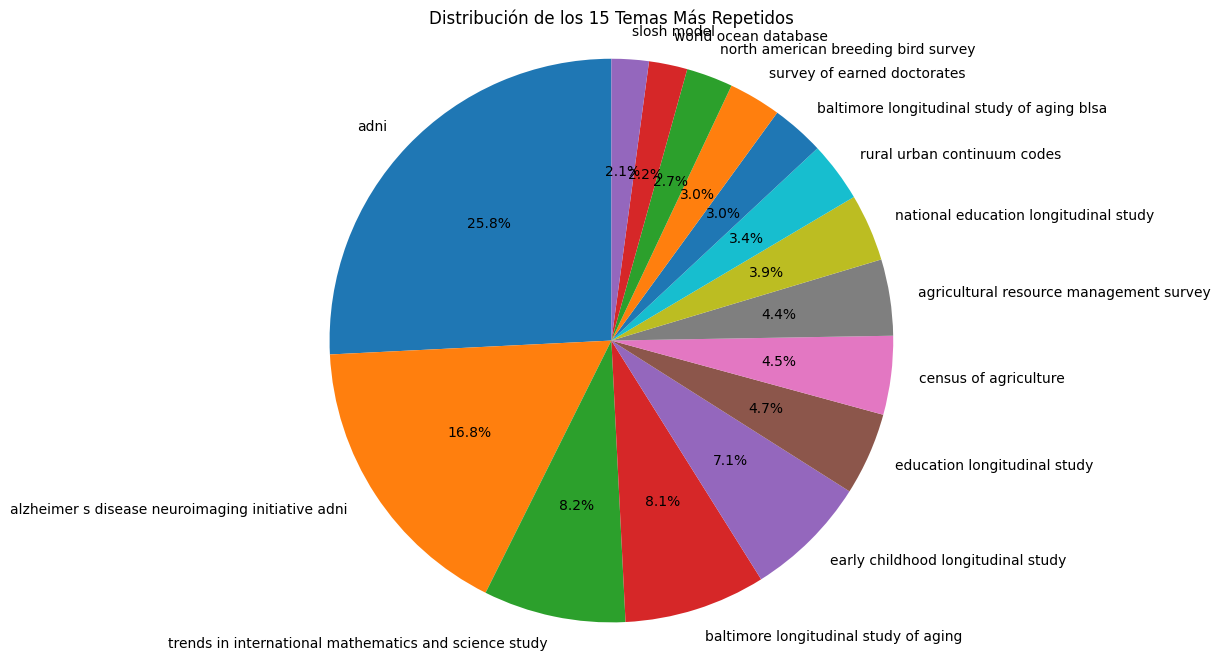

In [ ]:
import matplotlib.pyplot as plt

# Contar la cantidad de publicaciones por cada tema
tema_counts = data[column_name].value_counts()

# Seleccionar los 15 temas más frecuentes
top_15_temas = tema_counts.head(15)

# Crear un DataFrame para mostrar los resultados ordenados
tema_summary = top_15_temas.reset_index()
tema_summary.columns = ['Tema', 'Cantidad']

# Mostrar el resumen
print(tema_summary)

# Crear un gráfico de tarta con los 20 temas más repetidos
plt.figure(figsize=(8, 8))
plt.pie(top_15_temas, labels=top_15_temas.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de los 15 Temas Más Repetidos')
plt.axis('equal')
plt.show()



##Análisis del texto de las publicaciones

In [ ]:
df=data


def limpiar_texto(texto):
    # Eliminar todas las palabras que contienen 'http' o 'https'
    texto = re.sub(r'https?://\S+', '', texto)  # Eliminar palabras completas con http/https
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)  # Eliminar caracteres no alfabéticos
    texto = re.sub(r'@\w+', '', texto)  # Eliminar menciones
    texto = re.sub(r'#\w+', '', texto)  # Eliminar hashtags
    texto = texto.lower()  # Convertir a minúsculas
    return texto


#Corregir errores ortográficos
from spellchecker import SpellChecker
spell = SpellChecker()

def corregir_errores(texto):
    palabras = texto.split()
    palabras_corregidas = [
        spell.correction(word) if word in spell else word
        for word in palabras
    ]
    return ' '.join(palabras_corregidas)


# Eliminar puntuación, números y palabras vacías
stop_words = set(stopwords.words("english"))
ps = PorterStemmer()  # Crear el stemmer

def procesar_texto(texto):
    # Tokenizar (dividir el texto en palabras)
    palabras = texto.split()
    # Eliminar palabras vacías, números y aplicar stemming
    palabras = [ps.stem(word) for word in palabras if word not in stop_words]
    return ' '.join(palabras)

df['cleaned_title'] = df['pub_title'].apply(limpiar_texto)
df['cleaned_title'] = df['pub_title'].apply(corregir_errores)
df['cleaned_title'] = df['pub_title'].apply(procesar_texto)


Hemos creado una nueva variable con los títulos limpiados

In [ ]:
df.head()

,Id,pub_title,dataset_title,dataset_label,cleaned_label,cleaned_title
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,the impact dual enrol colleg degre attainment:...
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,educ attain high school dropout 8 year later. ...
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,differ outcom femal male student special educ
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,step stone option valu model postsecondari educ
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study,"parent effort, school resources, student achiev"


##Elaboración de un perfil de cada tema


Calculamos las palabras más repetidas en general para todos los temas y observamos cuales se repiten más en cada tema en particular.

De esta manera, podremos saber cuales son los temas científicos más "mainstream" y cuales pretender abordar temas poco tratados por la literatura.

In [ ]:
import nltk
nltk.download('punkt_tab')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Usamos CountVectorizer para contar las palabras en 'pub_title' (no en 'cleaned_label')
vectorizer = CountVectorizer(stop_words='english', max_features=500)  # top 500 palabras más frecuentes
X = vectorizer.fit_transform(data['pub_title'])  # Vectorizamos los títulos, no los temas

# Convertir la matriz de términos a un DataFrame para mejor visualización
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Añadir la columna de tema (cleaned_label) a las palabras vectorizadas
word_counts['Tema'] = data['cleaned_label']

# Agrupar por tema (cleaned_label) y contar la frecuencia de las palabras (suma por cada tema)
tema_palabras_frecuencia = word_counts.groupby('Tema').sum()

# Mostrar las palabras más repetidas por tema
for tema in tema_palabras_frecuencia.index:
    print(f"Palabras más repetidas en el tema '{tema}':")
    top_palabras = tema_palabras_frecuencia.loc[tema].sort_values(ascending=False).head(10)
    print(top_palabras)
    print("\n")


Palabras más repetidas en el tema '2019 ncov complete genome sequences':
2019           1
coronavirus    1
genomic        1
12             0
perspective    0
perceptions    0
performance    0
persistence    0
pet            0
pattern        0
Name: 2019 ncov complete genome sequences, dtype: int64


Palabras más repetidas en el tema '2019 ncov genome sequence':
2019           5
cov            2
novel          2
clinical       2
sars           2
19             2
coronavirus    2
covid          2
surface        1
associated     1
Name: 2019 ncov genome sequence, dtype: int64


Palabras más repetidas en el tema '2019 ncov genome sequences':
2019           4
human          2
novel          2
coronavirus    2
based          1
perspective    1
dynamics       1
genome         1
generation     1
analysis       1
Name: 2019 ncov genome sequences, dtype: int64


Palabras más repetidas en el tema 'adni':
disease       1554
alzheimer     1522
brain          680
cognitive      642
impairment     41

De esta manera, podremos saber cual es el tema más original

In [ ]:
# Contar el número de ceros en cada fila (tema)
ceros_por_tema = (tema_palabras_frecuencia == 0).sum(axis=1)

# Encontrar el tema con el mayor número de ceros
tema_con_mayor_ceros = ceros_por_tema.idxmax()
cantidad_ceros = ceros_por_tema.max()

print(f"El tema con el mayor número de ceros es '{tema_con_mayor_ceros}' con {cantidad_ceros} ceros.\n",
"Por lo que será el tema que contiene el menor número de palabras de las que más se repiten en el resto")


El tema con el mayor número de ceros es 'covid open research dataset' con 498 ceros.
 Por lo que será el tema que contiene el menor número de palabras de las que más se repiten en el resto


Por otro lado, vamos a utilizar el embedding preentrenado de Word2Vec ara vectorizar los títulos de las publicaciones.

Los vectores generados por Word2Vec permiten que el modelo capture las relaciones semánticas entre las palabras de los títulos. Los títulos que comparten un tema similar deberían tener vectores más cercanos entre sí en el espacio de características.

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Preprocesamiento básico: tokenización y eliminación de stop words
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())  # Tokenización y conversión a minúsculas
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  # Filtrar stopwords y puntuación
    return tokens

# Preprocesamos los títulos de las publicaciones
data['tokens'] = data['pub_title'].apply(preprocess)

# Entrenamos el modelo Word2Vec
model = Word2Vec(sentences=data['tokens'], vector_size=10, window=5, min_count=1, workers=4)

# Vectorizar los títulos con el modelo Word2Vec
def vectorize_title(tokens):
    # Para cada título, calculamos el vector promedio de sus palabras
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:  # Si no hay palabras en el vocabulario de Word2Vec
        return [0] * model.vector_size
    return [sum(vec) / len(vectors) for vec in zip(*vectors)]  # Promediamos los vectores

# Aplicar la vectorización a los títulos
X = data['tokens'].apply(vectorize_title)

# Convertir a DataFrame para poder visualizar los resultados
X_df = pd.DataFrame(list(X), columns=[f'feature_{i}' for i in range(10)])

# Añadir la columna de tema (cleaned_label) a las palabras vectorizadas
X_df['Tema'] = data['cleaned_label']

# Agrupar por tema (cleaned_label) y calcular la media de los vectores por tema
tema_palabras_frecuencia = X_df.groupby('Tema').mean()

# Mostrar las características promedio de cada tema
for tema in tema_palabras_frecuencia.index:
    print(f"Características promedio del tema '{tema}':")
    print(tema_palabras_frecuencia.loc[tema])
    print("\n")


Características promedio del tema '2019 ncov complete genome sequences':
feature_0    1.028851
feature_1   -0.751399
feature_2    0.293886
feature_3   -0.159480
feature_4    0.082666
feature_5    0.318500
feature_6    1.272564
feature_7    0.693027
feature_8   -1.429883
feature_9   -1.312968
Name: 2019 ncov complete genome sequences, dtype: float64


Características promedio del tema '2019 ncov genome sequence':
feature_0    0.945193
feature_1   -0.518365
feature_2    0.787026
feature_3   -0.144858
feature_4    0.454502
feature_5    0.337441
feature_6    1.019124
feature_7    0.831451
feature_8   -1.109547
feature_9   -1.031073
Name: 2019 ncov genome sequence, dtype: float64


Características promedio del tema '2019 ncov genome sequences':
feature_0    1.089970
feature_1   -0.706422
feature_2    0.727527
feature_3   -0.146567
feature_4    0.480619
feature_5    0.559749
feature_6    1.444624
feature_7    1.013701
feature_8   -1.765171
feature_9   -1.284329
Name: 2019 ncov genome sequenc

El análisis de las características promedio de los temas utilizando Word2Vec muestra que las representaciones vectoriales de cada tema varían a través de las diferentes características (features), lo que sugiere diferencias en los contextos y las relaciones semánticas entre las palabras asociadas a cada tema.

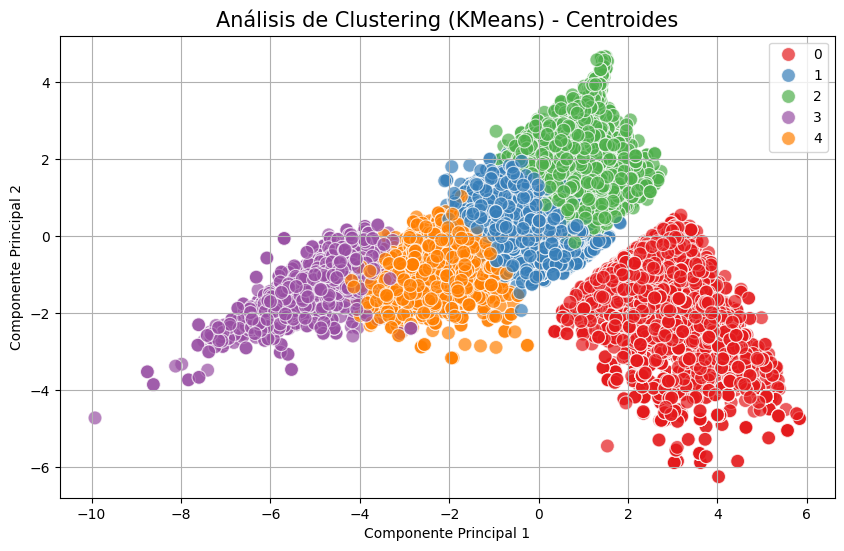

In [ ]:
# Instalar las bibliotecas necesarias (si no están instaladas)
# pip install matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Supongamos que tienes una matriz de vectores llamada 'temas_vectores' en un DataFrame
# Asegúrate de que tus vectores sean una matriz o DataFrame

# Ejemplo de cómo crear un DataFrame con tus vectores de temas:
# temas_vectores = pd.DataFrame(vectores)  # Si ya tienes la matriz de vectores, la conviertes en DataFrame

# Normalización de los datos
scaler = StandardScaler()
temas_scaled = scaler.fit_transform(X_df.drop('Tema', axis=1))

# Realizar KMeans clustering
n_clusters = 5  # Ajusta este valor según el número de clústeres que quieras
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(temas_scaled)

# Obtener los clústeres asignados a cada punto
clusters = kmeans.labels_

# Obtener los centroides de cada clúster
centroids = kmeans.cluster_centers_

# Crear un DataFrame con los resultados
X_df['Cluster'] = clusters

# Visualizar los resultados (PCA para reducir dimensiones a 2D para visualización)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(temas_scaled)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Graficar los puntos y los centroides en el espacio 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1', s=100, alpha=0.7)

plt.title('Análisis de Clustering (KMeans) - Centroides', fontsize=15)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()




#Anális de diagnóstico por imagen:

Explicación del conjunto de datos que vamos a analizar y lo que pretendemos realizar:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install patool

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.4/98.4 kB 4.1 MB/s eta 0:00:00


In [ ]:
import cv2
import os
import numpy as np
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
import patoolib

from tensorflow.keras.applications import ConvNeXtBase
from tensorflow.keras.callbacks    import EarlyStopping , ReduceLROnPlateau, TensorBoard , ModelCheckpoint
from sklearn.metrics import classification_report , confusion_matrix

from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l1_l2


from tensorflow.keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import numpy as np

from sklearn.preprocessing import LabelEncoder

In [ ]:


# Ruta al archivo .rar
rar_path = '/content/drive/MyDrive/Colab Notebooks/muestras/tumores-cerebrales-mri-dataset.rar'

# Carpeta destino donde se extraerán los archivos
extract_dir = '/content/tumores_cerebrales'

# Extraer el archivo .rar
patoolib.extract_archive(rar_path, outdir=extract_dir)
print(f"Contenido extraído en: {extract_dir}")


INFO patool: Extracting /content/drive/MyDrive/Colab Notebooks/muestras/tumores-cerebrales-mri-dataset.rar ...
INFO:patool:Extracting /content/drive/MyDrive/Colab Notebooks/muestras/tumores-cerebrales-mri-dataset.rar ...
INFO patool: ... creating output directory `/content/tumores_cerebrales'.
INFO:patool:... creating output directory `/content/tumores_cerebrales'.
INFO patool: running /usr/bin/unrar x -kb -or -- "/content/drive/MyDrive/Colab Notebooks/muestras/tumores-cerebrales-mri-dataset.rar"
INFO:patool:running /usr/bin/unrar x -kb -or -- "/content/drive/MyDrive/Colab Notebooks/muestras/tumores-cerebrales-mri-dataset.rar"
INFO patool: ... /content/drive/MyDrive/Colab Notebooks/muestras/tumores-cerebrales-mri-dataset.rar extracted to `/content/tumores_cerebrales'.
INFO:patool:... /content/drive/MyDrive/Colab Notebooks/muestras/tumores-cerebrales-mri-dataset.rar extracted to `/content/tumores_cerebrales'.


Contenido extraído en: /content/tumores_cerebrales


Tenemos una carpeta con 4 conjuntos de imágenes diferentes.

In [ ]:

# Listar el contenido de la carpeta extraída
labels = os.listdir(extract_dir)
print(f"Carpetas disponibles: {labels}")


Carpetas disponibles: ['meningioma', 'pituitary', 'glioma', 'no-tumor']


Las 3 primeras carpetas corresponden con imágenes de resonancias donde el paciente tenía cancer de 3 diferentes tipos. Mientras que la última carpeta contiene imágenes de pacientes sanos.

In [ ]:
PATH_DIR = extract_dir
SIZE= 100
#Establecemos un standard predeterminado de imágenes de 100 x 100

Procedemos a importar las imágenes y a aplanarlas para poder trabajar mejor con ellas.

In [ ]:
labels = os.listdir(PATH_DIR)

total_images = sum(len(files) for _,_ , files in os.walk(PATH_DIR))

X_train = np.empty ((total_images,SIZE,SIZE,3),dtype=np.uint8)
y_train = np.empty ((total_images,),dtype='<U32')

index = 0
#Convertimos imágenes de 224 x 224 a 100,100,3 para optimizar el modelo
clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
for pasta in labels:
    caminho_pasta = os.path.join(PATH_DIR,pasta)
    print("paste",caminho_pasta)
    for arquivo in tqdm((os.listdir(caminho_pasta))):
        caminho_arquivo  = os.path.join(caminho_pasta,arquivo)

        img = cv2.imread(caminho_arquivo,cv2.IMREAD_GRAYSCALE)
        img = clahe.apply(img)

        img = cv2.resize(img, (SIZE, SIZE))
        img = np.stack((img,) *3,axis=-1)

        X_train[index] = img
        y_train[index] = pasta
        index += 1

print('Tenemos un conjunto total de :', X_train.shape)

paste /content/tumores_cerebrales/meningioma


100%|██████████| 11000/11000 [00:17<00:00, 642.06it/s]


paste /content/tumores_cerebrales/pituitary


100%|██████████| 11000/11000 [00:17<00:00, 626.38it/s]


paste /content/tumores_cerebrales/glioma


100%|██████████| 11000/11000 [00:15<00:00, 713.63it/s] 


paste /content/tumores_cerebrales/no-tumor


100%|██████████| 11000/11000 [00:17<00:00, 637.67it/s]

Tenemos un conjunto total de : (44000, 100, 100, 3)


In [ ]:
#NO EJECUTAR
# Comprobar la forma de los datos procesados
print(f"Forma de X_train: {X_train.shape}")
print(f"Ejemplo de etiquetas en y_train: {np.unique(y_train)}")

Forma de X_train: (35200, 100, 100, 3)
Ejemplo de etiquetas en y_train: ['glioma' 'meningioma' 'no-tumor' 'pituitary']


In [ ]:
#Realizamos la división train/test

X_train , y_train  = shuffle(X_train , y_train, random_state = 42)
print("Shuffle",X_train.shape,y_train.shape)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print("Split",X_train.shape,y_train.shape,X_test.shape,y_test.shape)

Shuffle (44000, 100, 100, 3) (44000,)
Split (35200, 100, 100, 3) (35200,) (8800, 100, 100, 3) (8800,)


In [ ]:

print("\n \t Train shape \n")
print("y_train",y_train.shape)
print("X_train.shape",X_train.shape)
print("\n \t Test shape \n")
print("y_test",y_test.shape)
print("X_test.shape",X_test.shape)



 	 Train shape 

y_train (35200,)
X_train.shape (35200, 100, 100, 3)

 	 Test shape 

y_test (8800,)
X_test.shape (8800, 100, 100, 3)


['meningioma', 'pituitary', 'glioma', 'no-tumor']
meningioma
pituitary
glioma
no-tumor


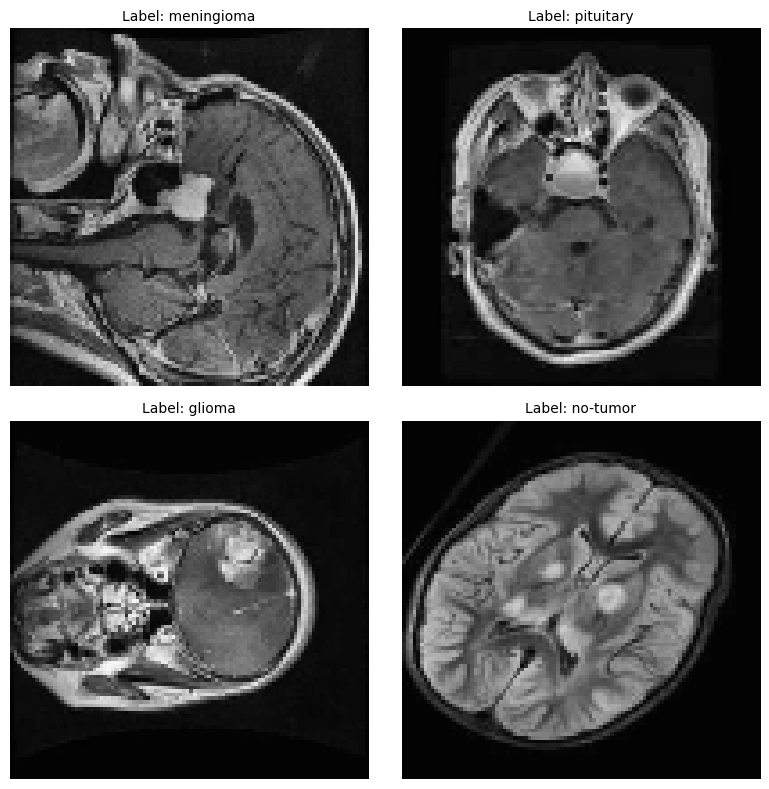

In [ ]:
import matplotlib.pyplot as plt

def mostra_imagem(imagem, ax, label):
    """Muestra una imagen en un eje específico (ax) con su label."""
    ax.imshow(imagem)
    ax.axis('off')  # Opcional, para ocultar los ejes
    ax.set_title(f"Label: {label}", fontsize=10)  # Título encima de la imagen

print(labels)
fig, axs = plt.subplots(2, 2, figsize=(8, 8))  # Crea una cuadrícula de 2x2

count = 0  # Contador para las imágenes
for label in labels:
    for idx in range(10):
        if label == y_train[idx]:
            print(y_train[idx])
            row, col = divmod(count, 2)  # Calcula la posición en la cuadrícula
            mostra_imagem(X_train[idx], axs[row, col], label)  # Muestra la imagen y el label
            count += 1
            break
    if count >= 4:  # Para una cuadrícula de 2x2, solo necesitamos 4 imágenes
        break

plt.tight_layout()  # Ajusta los subplots para que no se solapen
plt.show()



In [ ]:
#Codificación de las clases


#Usamos Label Encoder

label_encoder = LabelEncoder()

y_train_int = label_encoder.fit_transform(y_train)
y_test_int  = label_encoder.transform(y_test)

print("y_train en formato entero (label-encoder)",np.unique(y_train_int))
print("y_test en formato entero (label-encoder)",np.unique(y_test_int))

### One Hot Encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train_int)
y_test_one_hot  = tf.keras.utils.to_categorical(y_test_int)

print("y_train valores unicos",np.unique(y_train_one_hot))
print("y_test valores unicos" ,np.unique(y_test_one_hot))


print("\n y_train codificado (one-hot encoder)",y_train_one_hot)
print("\n y_test codificado (one-hot encoder)" ,y_test_one_hot)

y_train en formato entero (label-encoder) [0 1 2 3]
y_test en formato entero (label-encoder) [0 1 2 3]
y_train valores unicos [0. 1.]
y_test valores unicos [0. 1.]

 y_train codificado (one-hot encoder) [[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]

 y_test codificado (one-hot encoder) [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [ ]:
from tensorflow.keras.callbacks    import EarlyStopping , ReduceLROnPlateau, TensorBoard , ModelCheckpoint
from sklearn.metrics import confusion_matrix , precision_score, recall_score,f1_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix , precision_score, recall_score,f1_score
from tensorflow.keras.optimizers import Adam

##Red Neuronal MobileNetV2

Realizamos la red neuronal con un subconjunto aleatorio de imágenes para poder implementar el código con mayor eficiencia computacional

In [ ]:
import gc
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Subconjunto de datos
subset_size_train = 3000
subset_size_test = 500

# Dividir los datos en entrenamiento y prueba
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_train, y_train_one_hot, test_size=subset_size_test, train_size=subset_size_train, random_state=42)

# Configuración de K-Fold
kf = KFold(n_splits=4, random_state=42, shuffle=True)
histories = []
models = []
accuracies = []
lossies = []
confusion_matrices = []
precisions = []
recalls = []
f1_scores = []

# Iterar por cada Fold
for i, (train_index, val_index) in enumerate(kf.split(X_train_subset)):
    print(f"Fold {i+1}")

    # Dividir los datos en entrenamiento y validación
    X_train_fold = np.asarray(X_train_subset[train_index], dtype=np.float32)
    X_val = np.asarray(X_train_subset[val_index], dtype=np.float32)
    y_train_fold = np.asarray(y_train_subset[train_index], dtype=np.float32)
    y_val = np.asarray(y_train_subset[val_index], dtype=np.float32)

    # Crear el modelo con MobileNetV2
    mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

    model_output = tf.keras.layers.GlobalAveragePooling2D()(mobilenet.output)
    model_output = tf.keras.layers.Dropout(rate=0.35)(model_output)
    model_output = tf.keras.layers.Dense(4, activation='softmax', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.02))(model_output)
    model = tf.keras.models.Model(inputs=mobilenet.input, outputs=model_output)

    # Congelar las capas base
    for layer in mobilenet.layers:
        layer.trainable = False

    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    # CALLBACKS
    tensorboard = TensorBoard(log_dir=f'logs_fold_{i}')
    checkpoint = ModelCheckpoint(filepath=f"mobilenetv2_fold_{i+1}.keras", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=15, min_delta=0.001, mode='auto', verbose=1)

    # Entrenamiento con capas congeladas
    history = model.fit(X_train_fold, y_train_fold, epochs=5, verbose=1, batch_size=16, validation_data=(X_val, y_val), callbacks=[tensorboard, checkpoint, reduce_lr])

    # Liberar memoria
    del mobilenet
    gc.collect()

    # Fine-Tuning: Descongelar las capas base
    print("\n\nFine-Tuning")
    for layer in model.layers:
        layer.trainable = True

    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-5), metrics=['accuracy'])

    history_fine_tuning = model.fit(X_train_fold, y_train_fold, epochs=5, verbose=1, batch_size=16, validation_data=(X_val, y_val), callbacks=[tensorboard, checkpoint, reduce_lr])

    histories.append(history_fine_tuning)

    val_accuracy = history.history['val_accuracy'][-1]
    val_loss = history.history['val_loss'][-1]

    accuracies.append(val_accuracy)
    lossies.append(val_loss)

    # Predicciones
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_val, axis=1)

    # Métricas de clasificación
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

    confusion_matrices.append(cm)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    models.append(model)

    print(f"Fold {i+1} Accuracy: {val_accuracy}, Loss: {val_loss}")
    print(f"Confusion Matrix: \n{cm}")
    print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

    # Liberar memoria después de cada fold
    del model
    gc.collect()
    tf.keras.backend.clear_session()

# Evaluar en el conjunto de prueba
X_test_subset = np.asarray(X_test_subset, dtype=np.float32)
y_test_subset = np.asarray(y_test_subset, dtype=np.float32)
final_model = models[-1]  # Usar el último modelo entrenado

y_test_pred = final_model.predict(X_test_subset)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test_subset, axis=1)

# Métricas finales
cm_test = confusion_matrix(y_test_true_classes, y_test_pred_classes)
precision_test = precision_score(y_test_true_classes, y_test_pred_classes, average='weighted')
recall_test = recall_score(y_test_true_classes, y_test_pred_classes, average='weighted')
f1_test = f1_score(y_test_true_classes, y_test_pred_classes, average='weighted')

print("\nResumen final en conjunto de prueba:")
print(f"Confusion Matrix: \n{cm_test}")
print(f"Precision: {precision_test}, Recall: {recall_test}, F1 Score: {f1_test}")


Fold 1


<ipython-input-12-e4c66eff4ab2>:39: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.3926 - loss: 3.1194
Epoch 1: val_accuracy improved from -inf to 0.53733, saving model to mobilenetv2_fold_1.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 33s 184ms/step - accuracy: 0.3931 - loss: 3.1157 - val_accuracy: 0.5373 - val_loss: 1.9212 - learning_rate: 0.0010
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.5475 - loss: 1.8552
Epoch 2: val_accuracy improved from 0.53733 to 0.60933, saving model to mobilenetv2_fold_1.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 40s 180ms/step - accuracy: 0.5476 - loss: 1.8543 - val_accuracy: 0.6093 - val_loss: 1.4102 - learning_rate: 0.0010
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.5775 - loss: 1.4693
Epoch 3: val_accuracy improved from 0.60933 to 0.62400, saving model to mobilenetv2_fold_1.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 44s 205ms/step - accuracy: 0.5775 - loss: 1.4690 - val_accuracy: 0.6240 - val_loss: 1

<ipython-input-12-e4c66eff4ab2>:39: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))


Epoch 1/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.3908 - loss: 3.1225
Epoch 1: val_accuracy improved from -inf to 0.61867, saving model to mobilenetv2_fold_2.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 38s 234ms/step - accuracy: 0.3912 - loss: 3.1189 - val_accuracy: 0.6187 - val_loss: 1.7898 - learning_rate: 0.0010
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.5776 - loss: 1.8097
Epoch 2: val_accuracy improved from 0.61867 to 0.64000, saving model to mobilenetv2_fold_2.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 27s 194ms/step - accuracy: 0.5775 - loss: 1.8092 - val_accuracy: 0.6400 - val_loss: 1.4732 - learning_rate: 0.0010
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.5815 - loss: 1.4901
Epoch 3: val_accuracy did not improve from 0.64000
141/141 ━━━━━━━━━━━━━━━━━━━━ 43s 212ms/step - accuracy: 0.5814 - loss: 1.4899 - val_accuracy: 0.6360 - val_loss: 1.3391 - learning_rate: 0.0010
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 

<ipython-input-12-e4c66eff4ab2>:39: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))


Epoch 1/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - accuracy: 0.3547 - loss: 3.2099
Epoch 1: val_accuracy improved from -inf to 0.57200, saving model to mobilenetv2_fold_3.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 40s 236ms/step - accuracy: 0.3552 - loss: 3.2063 - val_accuracy: 0.5720 - val_loss: 1.8207 - learning_rate: 0.0010
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.5503 - loss: 1.8150
Epoch 2: val_accuracy did not improve from 0.57200
141/141 ━━━━━━━━━━━━━━━━━━━━ 29s 209ms/step - accuracy: 0.5503 - loss: 1.8144 - val_accuracy: 0.5440 - val_loss: 1.6089 - learning_rate: 0.0010
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.5887 - loss: 1.4880
Epoch 3: val_accuracy improved from 0.57200 to 0.61333, saving model to mobilenetv2_fold_3.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 36s 176ms/step - accuracy: 0.5887 - loss: 1.4878 - val_accuracy: 0.6133 - val_loss: 1.3113 - learning_rate: 0.0010
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 

<ipython-input-12-e4c66eff4ab2>:39: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))


Epoch 1/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.3813 - loss: 3.1309
Epoch 1: val_accuracy improved from -inf to 0.56400, saving model to mobilenetv2_fold_4.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 39s 241ms/step - accuracy: 0.3817 - loss: 3.1274 - val_accuracy: 0.5640 - val_loss: 1.7840 - learning_rate: 0.0010
Epoch 2/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5300 - loss: 1.8219
Epoch 2: val_accuracy improved from 0.56400 to 0.63200, saving model to mobilenetv2_fold_4.keras
141/141 ━━━━━━━━━━━━━━━━━━━━ 31s 218ms/step - accuracy: 0.5301 - loss: 1.8212 - val_accuracy: 0.6320 - val_loss: 1.4068 - learning_rate: 0.0010
Epoch 3/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.5856 - loss: 1.4643
Epoch 3: val_accuracy did not improve from 0.63200
141/141 ━━━━━━━━━━━━━━━━━━━━ 37s 193ms/step - accuracy: 0.5856 - loss: 1.4641 - val_accuracy: 0.5920 - val_loss: 1.3203 - learning_rate: 0.0010
Epoch 4/5
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 

## Resumen final en conjunto de test:

Confusion Matrix:

[ 47  20  67   0]

 [  2  35  86   2]

 [  1   0 122   0]

 [  0   8  84  26]

Precision: 0.6935506318256178, Recall: 0.46, F1 Score: 0.43858406471373773

##Explicación del código:


MobileNetV2 fue seleccionada como base de la red neuronal debido a su eficiencia y capacidad para realizar tareas de clasificación de imágenes con alta precisión. Este modelo ha sido preentrenado con ImageNet, un extenso conjunto de datos que incluye millones de imágenes, lo que le permite detectar patrones generales como bordes, texturas y formas. Estas características hacen que MobileNetV2 sea una elección ideal para problemas donde se busca reutilizar conocimiento preexistente y adaptar el modelo a nuevas tareas específicas con menor esfuerzo computacional.

El proceso de fine-tuning se utilizó para aprovechar al máximo este conocimiento preentrenado mientras se ajustaba el modelo a la clasificación de nuestras cuatro categorías. Inicialmente, las capas base de MobileNetV2 se congelaron, evitando que se actualizaran sus pesos. Esto se hizo para proteger las características genéricas aprendidas durante el entrenamiento con ImageNet, lo que ayuda a prevenir que el modelo pierda ese conocimiento mientras se ajustan las nuevas capas específicas del problema. Durante esta etapa inicial, solo se entrenaron las capas superiores añadidas, como la capa de Global Average Pooling, Dropout y la densa con activación softmax. Este enfoque no solo redujo el riesgo de sobreajuste, sino que también permitió un entrenamiento más rápido y estable.

Después de este entrenamiento inicial, se procedió a descongelar todas las capas para ajustar el modelo completo. Este segundo paso permite que el conocimiento general de MobileNetV2 se refine en función de las características específicas del conjunto de datos actual, logrando un equilibrio entre lo aprendido previamente y las necesidades del problema. Este enfoque en dos etapas garantiza un desempeño óptimo, aprovechando la robustez de MobileNetV2 mientras se adapta eficientemente a nuestra tarea de clasificación.

##Predicción de una nueva imagen

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Ruta de la nueva imagen
img_path = '/content/drive/MyDrive/G_176_HF_.jpg' # Cogemos una imagen que no hemos usado para entrenar la red

# Cargar la imagen y preprocesarla
img = image.load_img(img_path, target_size=(SIZE, SIZE))  # SIZE debe ser el tamaño que usaste al entrenar
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Añadir una dimensión extra para batch
img_array = preprocess_input(img_array)  # Preprocesar para MobileNetV2

# Realizar la predicción
predictions = final_model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)  # Índice de la clase con mayor probabilidad
probabilities = predictions[0]  # Probabilidades de cada clase

# Mostrar el resultado
print(f"Predicción de la clase: {predicted_class[0]}")
print(f"Probabilidades de cada clase: {probabilities}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicción de la clase: 0
Probabilidades de cada clase: [0.33867803 0.26173532 0.1035224  0.29606423]


In [ ]:
class_labels = {0: "glioma", 1: "pituitary", 2: "meningioma", 3: "no-tumor"}
print(f"Clase predicha: {class_labels[predicted_class[0]]}")


Clase predicha: glioma


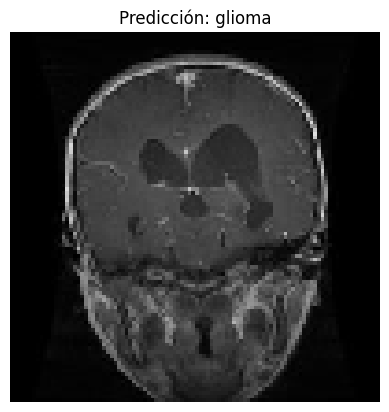

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(f"Predicción: {class_labels[predicted_class[0]]}")
plt.axis('off')
plt.show()
